In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
os.environ['KAGGLE_USERNAME'] = 'morbaenoma'
os.environ['KAGGLE_KEY'] = "fcf85e125cea448d18703f912fa7a8a2"

In [3]:
!kaggle datasets download -d airplane2230/apparel-image-dataset-2

 99% 246M/249M [00:03<00:00, 101MB/s]
100% 249M/249M [00:03<00:00, 83.2MB/s]


In [4]:
import os
import zipfile
os.mkdir('/content/csv_data')

In [5]:
with zipfile.ZipFile('/content/apparel-image-dataset-2.zip', 'r') as existing_zip:

  existing_zip.extractall('/content/csv_data/nocolorinfo')

In [ ]:
import pandas as pd

DATA_PATH = '/content/csv_data/nocolorinfo'

train_df = pd.read_csv(DATA_PATH +'/train.csv')
val_df = pd.read_csv(DATA_PATH +'/val.csv')
test_df = pd.read_csv(DATA_PATH +'/test.csv')

train_df['image'] = DATA_PATH + train_df['image'].apply(lambda x: str(x). replace('\\','/')[1: ])
val_df['image'] = DATA_PATH + val_df['image'].apply(lambda x: str(x). replace('\\','/')[1: ])
test_df['image'] = DATA_PATH + test_df['image'].apply(lambda x: str(x). replace('\\','/')[1: ])

del train_df['Unnamed: 0']
train_df.head()

In [19]:
val_df

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,/content/csv_data/nocolorinfo/clothes_dataset/...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,2386,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2387,2387,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2388,2388,/content/csv_data/nocolorinfo/clothes_dataset/...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2389,2389,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   5578 non-null   object 
 1   black   5578 non-null   float64
 2   blue    5578 non-null   float64
 3   brown   5578 non-null   float64
 4   green   5578 non-null   float64
 5   red     5578 non-null   float64
 6   white   5578 non-null   float64
 7   dress   5578 non-null   float64
 8   shirt   5578 non-null   float64
 9   pants   5578 non-null   float64
 10  shorts  5578 non-null   float64
 11  shoes   5578 non-null   float64
dtypes: float64(11), object(1)
memory usage: 523.1+ KB


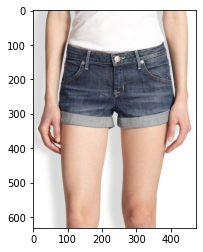

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread(train_df.iloc[0]['image'])
plt.imshow(img)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale= 1./255)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Flatten(input_shape = (112, 112, 3)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(11, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [11]:
batch_size = 32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white',
             'dress', 'shirt', 'pants', 'shorts', 'shoes']

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory='',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode = 'rgb',
    class_mode = 'raw',
    batch_size = batch_size,
    shuffle = True,
    seed=42)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    directory = '',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


In [12]:
def get_steps(num_samples, batch_size):
  if(num_samples % batch_size) > 0:
    return(num_samples // batch_size) +1
  else :
    return num_samples // batch_size

In [13]:
history = model.fit(train_generator,
                    steps_per_epoch = get_steps(len(train_df), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_steps(len(val_df), batch_size),
                    epochs = 10)

Epoch 1/10
175/175 [==============================] - 38s 215ms/step - loss: 0.5597 - acc: 0.3161 - val_loss: 0.3181 - val_acc: 0.2656
Epoch 2/10
 12/175 [=>............................] - ETA: 25s - loss: 0.3056 - acc: 0.3464

KeyboardInterrupt: ignored

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = train_datagen.flow_from_dataframe(
    dataframe = test_df,
    directory=None,
    x_col = 'image',
    y_col = None,
    target_size = (112, 112),
    color_mode = 'rgb',
    class_mode = None,
    batch_size = batch_size,
    shuffle = False)

In [ ]:
preds = model.predict(test_generator,
                      steps = get_steps(len(test_df), batch_size),
                      verbose=1)

In [ ]:
preds.shape

In [ ]:
preds[0]

In [ ]:
prob = zip(class_col, list(preds[1]))
prob

In [ ]:
sorted(list(prob), key = lambda z: z[1], reverse = True)

In [ ]:
import cv2
do_preds = preds[:8]

for i, pred in enumerate(do_preds):
  plt.subplot(2, 4, i + 1)
  prob = zip(class_col, list(pred))
  prob = sorted(list(prob), key = lambda z:z[1], reverse = True)[:2]

  image = cv2.imread(test_df['image'][i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  plt.imshow(image)
  plt.title(f'{prob[0][0]}: {round(prob[0][1] *100, 2)}% \n {prob[1][0]}: {round(prob[1][1] *100, 2)}%')

plt.tight_layout()